# Chapter 3. Classification

This chapter will be using MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)

In [2]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [3]:
X.shape

(70000, 784)

In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
y.shape

(70000,)

Peeking at one digit from the dataset

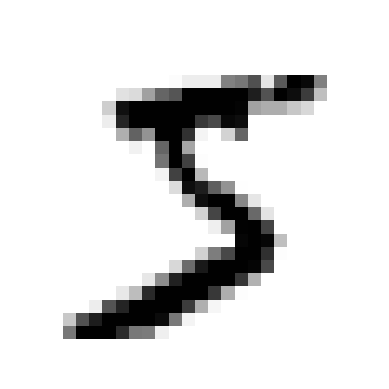

In [6]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [7]:
# It is a 5 and that is what the label tell us:
y[0]

'5'

In [14]:
# MNIST is already split into training set (first 60k images) and test set
# (last 10k images)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

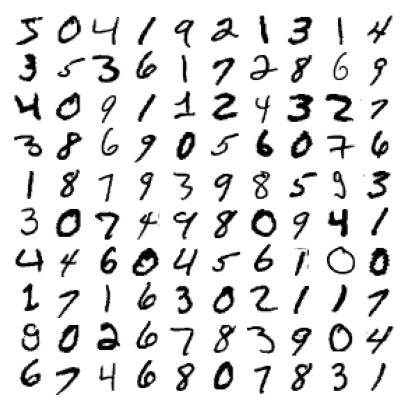

In [12]:
# see 100 images
plt.figure(figsize=(5,5))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10,10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

## Training a Binary Classifier

Train an ML algorithm to distinguish between 5 and non-5.

In [15]:
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

Train a stochastic gradient descent classifier

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [17]:
# now we can use it to detect images of the number 5:
sgd_clf.predict([some_digit])

array([ True])

## Performance Measures

**Measuring Accuracy Using Cross-Validation**

In [18]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [19]:
# creating a dummy classifier and checking its accuracy
from sklearn.dummy import DummyClassifier

# classifier always say the answer is not 5 (False)
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) # prints False: no 5s detected

False


In [20]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

It has over 90% accuracy! That is because only about 10% of the images are 5s.
This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when youa re dealing with skewed datasets (when some classes are much more frequent than others). A much better way to evaluate the performance of a classifier is to look at the confusion matrix (CM)

**Implementing Cross-Validation**

Occasionally you will need more control over the cross-validation
process than what Scikit-Learn provides off the shelf. In these cases,
you can implement cross-validation yourself. The following code does
roughly the same thing as Scikit-Learn’s cross_val_score() function,
and it prints the same result:

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3) # add shuffle=True if the dataset is
                                      # not already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    